In [1]:
import pandas as pd

In [2]:
from mlxtend.frequent_patterns import apriori,association_rules


In [3]:
books = []
with open("C:/Users/anjum/Documents/Exelir workshop/Dataset/book.csv") as f:
    books = f.read()

In [6]:
# splitting the data into separate transactions using separator as "\n"
books = books.split("\n")

In [7]:
books_list = []
for i in books:
    books_list.append(i.split(","))

In [8]:
books_list

[['ChildBks',
  'YouthBks',
  'CookBks',
  'DoItYBks',
  'RefBks',
  'ArtBks',
  'GeogBks',
  'ItalCook',
  'ItalAtlas',
  'ItalArt',
  'Florence'],
 ['0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0'],
 ['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0'],
 ['0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0'],
 ['1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1'],
 ['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0'],
 ['1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0'],
 ['1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0'],
 ['1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1'],
 ['1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0'],
 ['1', '1', '1', '0', '0', '0', '0', '0

In [9]:
all_books_list = [i for item in books_list for i in item]

In [10]:
from collections import Counter,OrderedDict


In [11]:
item_frequencies = Counter(all_books_list)

In [12]:
# after sorting
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [13]:
item_frequencies

[('ChildBks', 1),
 ('YouthBks', 1),
 ('CookBks', 1),
 ('DoItYBks', 1),
 ('RefBks', 1),
 ('ArtBks', 1),
 ('GeogBks', 1),
 ('ItalCook', 1),
 ('ItalAtlas', 1),
 ('ItalArt', 1),
 ('Florence', 1),
 ('', 1),
 ('1', 4845),
 ('0', 17155)]

In [14]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))

In [15]:
items = list(reversed([i[0] for i in item_frequencies]))


In [16]:
# barplot of top 10 
import matplotlib.pyplot as plt

In [18]:
plt.bar(height = frequencies[1:11],left = list(range(1,11)),color='rgbkymc';plt.xticks(list(range(1,11),),items[1:11]);plt.xlabel("items")


SyntaxError: invalid syntax (<ipython-input-18-b7c23a0ca6c1>, line 1)

In [20]:
books_series  = pd.DataFrame(pd.Series(books_list))


In [22]:
books_series = books_series.iloc[:2001,:] # removing the last empty transaction


In [23]:
books_series.columns = ["transactions"]


In [24]:
X = books_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')


In [25]:
X

,0,1,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks
0,0,0,1,1,1,1,1,1,1,1,1,1,1
1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,1,0,0,0,0,0,0,0,0,0,0,0
1997,1,0,0,0,0,0,0,0,0,0,0,0,0
1998,1,0,0,0,0,0,0,0,0,0,0,0,0
1999,1,1,0,0,0,0,0,0,0,0,0,0,0


In [27]:
frequent_itemsets = apriori(X, min_support=0.003, max_len=3,use_colnames = True)


In [28]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)


Text(0, 0.5, 'support')

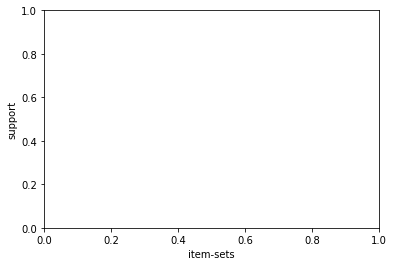

In [29]:
plt.xlabel('item-sets');plt.ylabel('support')


In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [31]:
rules.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(0),0.789105,0.998501,0.788106,0.998733,1.000233,0.000184,1.183658
1,(0),(1),0.998501,0.789105,0.788106,0.789289,1.000233,0.000184,1.000872


In [32]:
rules.sort_values('lift',ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(0),0.789105,0.998501,0.788106,0.998733,1.000233,0.000184,1.183658
1,(0),(1),0.998501,0.789105,0.788106,0.789289,1.000233,0.000184,1.000872
